In [7]:
import kagglehub

# Указать пользовательскую директорию
path = kagglehub.dataset_download(
    "muki2003/yolo-drone-detection-dataset"
)

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'yolo-drone-detection-dataset' dataset.
Path to dataset files: /kaggle/input/yolo-drone-detection-dataset


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.5 MB/s eta 0:00:00


In [4]:
import cv2
import os
from pathlib import Path
import numpy as np
import random
import torch
from ultralytics import YOLO

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
dataset_path = "/kaggle/input/yolo-drone-detection-dataset/drone_dataset"

yaml_text = f"""
path: {dataset_path}
train: train/images
val: valid/images

names:
  0: drone
"""

with open("data.yaml", "w") as f:
    f.write(yaml_text)

print("data.yaml created:")
print(yaml_text)

data.yaml created:

path: /kaggle/input/yolo-drone-detection-dataset/drone_dataset
train: train/images
val: valid/images

names:
  0: drone



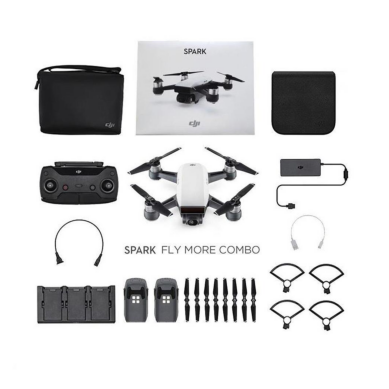

In [8]:
img = mpimg.imread("/kaggle/input/yolo-drone-detection-dataset/drone_dataset/train/images/pic_172.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()


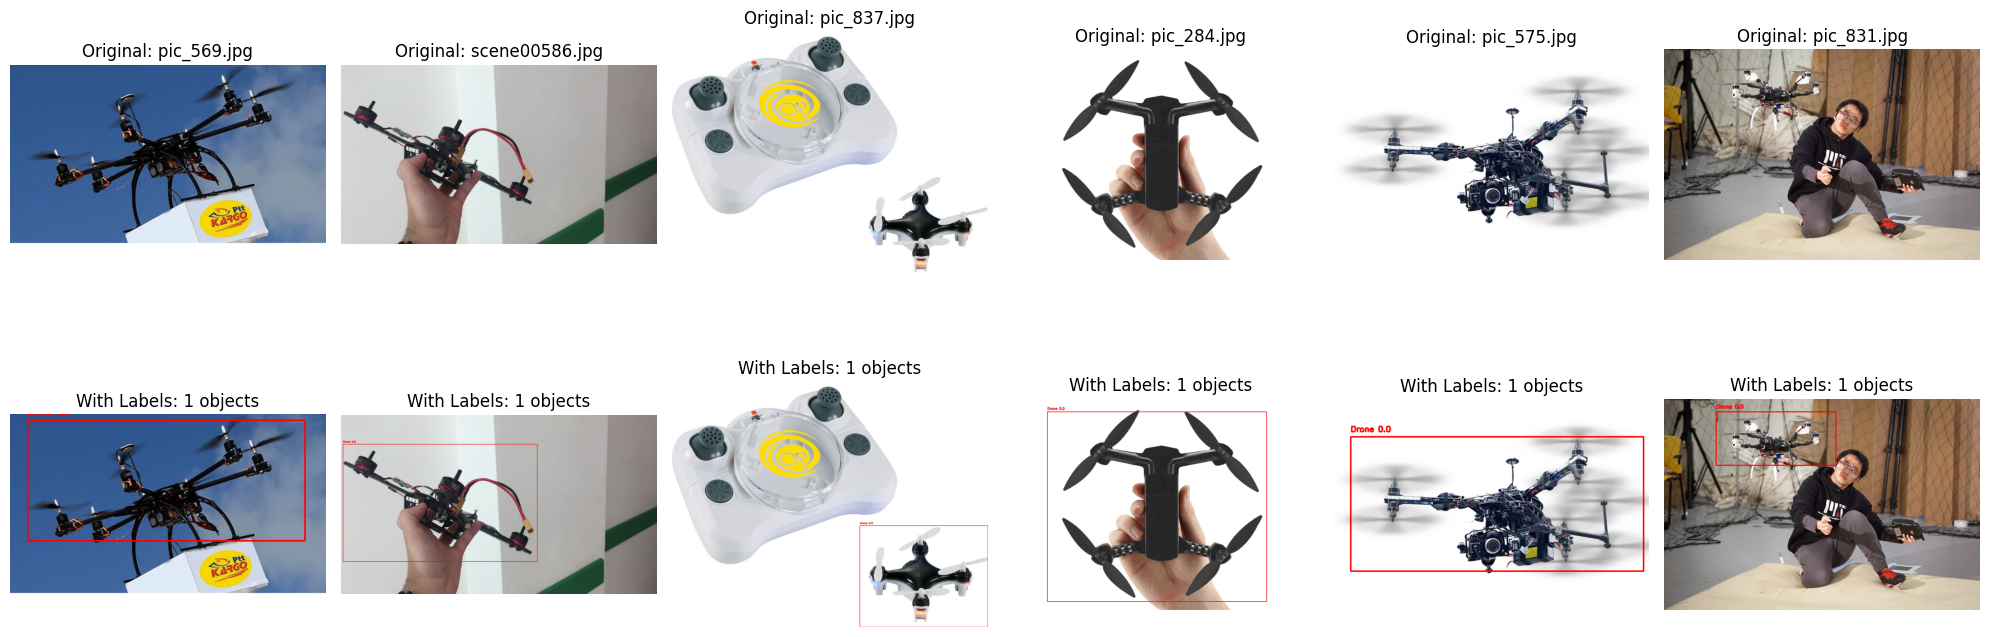

In [9]:
def show_data_samples(num_samples=5):
    base_path = Path(r"/kaggle/input/yolo-drone-detection-dataset/drone_dataset")
    train_images_path = base_path / "train" / "images"
    train_labels_path = base_path / "train" / "labels"
    image_files = list(train_images_path.glob("*.jpg")) + list(train_images_path.glob("*.png"))
    samples = random.sample(image_files, min(num_samples, len(image_files)))
    fig, axes = plt.subplots(2, num_samples, figsize=(20, 8))
    if num_samples == 1:
        axes = axes.reshape(2, 1)

    for i, image_path in enumerate(samples):
        image = cv2.imread(str(image_path))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        label_path = train_labels_path / f"{image_path.stem}.txt"

        image_with_boxes = image.copy()
        h, w = image.shape[:2]

        if label_path.exists():
            with open(label_path, 'r') as f:
                lines = f.readlines()

            for line in lines:
                data = line.strip().split()
                if len(data) == 5:
                    class_id, x_center, y_center, bbox_w, bbox_h = map(float, data)

                    x_center *= w
                    y_center *= h
                    bbox_w *= w
                    bbox_h *= h

                    x1 = int(x_center - bbox_w/2)
                    y1 = int(y_center - bbox_h/2)
                    x2 = int(x_center + bbox_w/2)
                    y2 = int(y_center + bbox_h/2)

                    cv2.rectangle(image_with_boxes, (x1, y1), (x2, y2), (255, 0, 0), 2)
                    cv2.putText(image_with_boxes, f'Drone {class_id}', (x1, y1-10),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

        axes[0, i].imshow(image)
        axes[0, i].set_title(f'Original: {image_path.name}')
        axes[0, i].axis('off')
        axes[1, i].imshow(image_with_boxes)
        axes[1, i].set_title(f'With Labels: {len(lines) if label_path.exists() else 0} objects')
        axes[1, i].axis('off')

    plt.tight_layout()
    plt.show()

show_data_samples(6)

In [10]:
model = YOLO('yolov8m.pt')

model.train(data="/content/data.yaml", epochs=30)

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretr

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cba707934a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
!zip -r runs.zip runs